In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score, mean_absolute_error
import math

import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.tree import export_graphviz
import graphviz
from collections import Counter

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler_min_max = MinMaxScaler(feature_range=(0, 1))

from IPython.display import Image
from scipy.stats import norm
from scipy.signal import argrelextrema

pd.set_option('display.max_columns', None)

In [54]:
prices = pd.read_csv("useful_data/round_2_day_1_joined_table.csv")
prices.rename(columns={prices.columns[0]: 'timestamp'}, inplace=True)
prices

,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,total_ask_vol,total_bid_vol,ask_vwap,bid_vwap,spread
0,0,1094.0,10.0,1093.0,3.0,1086.0,41.0,1102.0,10.0,1104.0,3.0,1111.0,41.0,1098.0,0.000000,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1,54.0,54.0,1108.944444,1087.870370,8.0
1,100,1094.0,6.0,1093.0,2.0,1087.0,51.0,1102.0,6.0,1103.0,2.0,1110.0,51.0,1098.0,0.000000,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1,59.0,59.0,1108.949153,1087.915254,8.0
2,200,1093.0,6.0,1092.0,3.0,1085.0,49.0,1101.0,6.0,1102.0,3.0,1108.0,49.0,1097.0,109600.000000,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1,58.0,58.0,1106.965517,1086.189655,8.0
3,300,1093.0,10.0,1092.0,4.0,1085.0,52.0,1101.0,10.0,1102.0,4.0,1109.0,52.0,1097.0,109600.000000,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1,66.0,66.0,1107.363636,1086.636364,8.0
4,400,1093.0,10.0,1092.0,3.0,1086.0,51.0,1101.0,10.0,1102.0,3.0,1109.0,51.0,1097.0,109600.000000,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1,64.0,64.0,1107.421875,1087.375000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99500,1067.0,5.0,1066.0,4.0,1060.0,43.0,1074.0,5.0,1075.0,4.0,1082.0,43.0,1070.5,111088.679688,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1,52.0,52.0,1080.692308,1061.134615,7.0
996,99600,1068.0,7.0,1067.0,2.0,1061.0,46.0,1075.0,7.0,1076.0,2.0,1083.0,46.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1,55.0,55.0,1081.727273,1062.109091,7.0
997,99700,1068.0,5.0,1067.0,3.0,1061.0,48.0,1076.0,5.0,1077.0,3.0,1083.0,48.0,1072.0,111088.679688,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1,56.0,56.0,1082.053571,1061.946429,8.0
998,99800,1068.0,8.0,1067.0,3.0,1061.0,49.0,1075.0,8.0,1076.0,3.0,1083.0,49.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.4869,84.962590,1,60.0,60.0,1081.583333,1062.233333,7.0


In [55]:
prices_neg1 = pd.read_csv("../../data2024/round-2-island-data-bottle/prices_round_2_day_-1.csv", sep=";")

day = prices_neg1.columns[-1]
new_order = [day] + [col for col in prices_neg1.columns if col != day] 
prices_neg1 = prices_neg1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_neg1[col] = pd.to_numeric(prices_neg1[col], errors='coerce')
    
prices_0 = pd.read_csv("../../data2024/round-2-island-data-bottle/prices_round_2_day_0.csv", sep=";")

day = prices_0.columns[-1]
new_order = [day] + [col for col in prices_0.columns if col != day] 
prices_0 = prices_0[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_0[col] = pd.to_numeric(prices_0[col], errors='coerce')

prices_pos1 = pd.read_csv("../../data2024/round-2-island-data-bottle/prices_round_2_day_1.csv", sep=";")

day = prices_pos1.columns[-1]
new_order = [day] + [col for col in prices_pos1.columns if col != day] 
prices_pos1 = prices_pos1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_pos1[col] = pd.to_numeric(prices_pos1[col], errors='coerce')

orchids = pd.concat([prices_neg1, prices_0, prices_pos1], ignore_index=True)
orchids['new_timestamp'] = orchids['timestamp']
orchids.loc[10001:, 'new_timestamp'] += 1000100
orchids.loc[20002:, 'new_timestamp'] += 1000100
orchids

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400
...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100


In [92]:
orchids['alt_sun'] = np.where(orchids['SUNLIGHT'] >= 2500, orchids['SUNLIGHT'], 0) / 100 # overpowers SUNLIGHT sometimes
orchids['alt_cum_sun'] = orchids.groupby('day')['alt_sun'].cumsum() / 100 # no
orchids['alt_remain_sun'] = (25 * 7 / 12 - np.minimum(orchids['alt_cum_sun'], 25 * 7 / 12)) * 12 / 7 # yes
orchids['alt_remain_sun_exp'] = np.exp(orchids['alt_remain_sun'])
orchids['sun_roll'] = orchids['SUNLIGHT'].rolling(window=round(10000*7/12), min_periods = 1).mean()

orchids['sun_change'] = orchids['SUNLIGHT'].pct_change() * 10000 # yes
orchids['sun_diff'] = orchids['SUNLIGHT'].diff() * 100 # yes

orchids['hum_dist'] = orchids['HUMIDITY'] - 70
orchids['abs_hum_dist'] = orchids['hum_dist'].abs() # keep
orchids['alt_hum_dist'] = np.maximum(orchids['abs_hum_dist'] - 10, 0) # not as good

orchids['hum_exp'] = np.exp(orchids['abs_hum_dist'])
orchids['alt_hum_exp'] = np.exp(orchids['alt_hum_dist'])
                                     
orchids['high_low_humidity'] = ((orchids['HUMIDITY'] < 60) | (orchids['HUMIDITY'] > 80)).astype(int) # indicator
orchids['mid_humidity'] = ((orchids['HUMIDITY'] >= 60) | (orchids['HUMIDITY'] <= 80)).astype(int) # indicator

orchids['hum_change'] = orchids['HUMIDITY'].pct_change() * 100
orchids['hum_diff'] = orchids['HUMIDITY'].diff() * 100 # yes

orchids['hum_avg'] = orchids.groupby('day')['HUMIDITY'].expanding().mean().reset_index(level=0, drop=True)
orchids['hum_avg_dist'] = orchids['hum_avg'] - 70
orchids['abs_hum_avg_dist'] = orchids['hum_avg_dist'].abs()

orchids['roll_hum_avg'] = orchids.groupby('day')['HUMIDITY'].transform(lambda x: x.rolling(window=70, min_periods=1).mean())
orchids['roll_hum_avg_dist'] = orchids['roll_hum_avg'] - 70
orchids['abs_roll_hum_avg_dist'] = orchids['roll_hum_avg_dist'].abs()

# orchids['hum_diff_hl'] = 

orchids['tte'] = (10000000 - orchids['timestamp']) / 100000

orchids['hum_dist_change_tte'] = orchids['tte'] * orchids['hum_change'] * orchids['abs_hum_dist']


orchids['orchid_diff'] = orchids['ORCHIDS'].diff()
orchids['orchid_shift'] = orchids.groupby('day')['ORCHIDS'].shift(-400)
orchids['orchid_log'] = np.log(orchids['ORCHIDS'])

orchids['orchid_sun'] = orchids['orchid_diff'] / orchids['SUNLIGHT'].diff()
orchids['orchid_hum'] = orchids['orchid_diff'] / orchids['HUMIDITY'].diff()

features = ['TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'tte']
features_hl_hum = ['alt_sun', 'alt_cum_sun', 'sun_change', 'sun_diff', 'hum_dist', 'abs_hum_dist',
                        'hum_diff', 'alt_hum_exp', 'roll_hum_avg', 
                       'hum_avg_dist', 'abs_hum_avg_dist', 'roll_hum_avg_dist', 'abs_roll_hum_avg_dist',
                       'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
features_mid_hum = ['alt_sun', 'alt_cum_sun', 'alt_remain_sun', 'alt_remain_sun_exp', 'sun_change', 'sun_diff', 'hum_dist', 'abs_hum_dist',
                        'alt_hum_dist', 'hum_change', 'hum_diff', 'hum_avg', 'hum_exp', 'alt_hum_exp', 'roll_hum_avg', 
                        'hum_avg_dist', 'abs_hum_avg_dist', 'roll_hum_avg_dist', 'abs_roll_hum_avg_dist',
                       'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
orchids #[orchids['alt_hum_diff']>0]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alt_remain_sun_exp,sun_roll,sun_change,sun_diff,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,roll_hum_avg_dist,abs_roll_hum_avg_dist,tte,hum_dist_change_tte,orchid_diff,orchid_shift,orchid_log,orchid_sun,orchid_hum
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0,25.0,0.250000,24.571429,4.690680e+10,2500.000000,NaN,NaN,9.00000,9.00000,0.0,8103.083928,1.0,0,1,NaN,NaN,79.000000,9.000000,9.000000,79.000000,9.000000,9.000000,100.000,NaN,NaN,1202.25,7.090077,NaN,NaN
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100,0.0,0.250000,24.571429,4.690680e+10,2499.709850,-2.321200,-58.03,9.00410,9.00410,0.0,8136.374771,1.0,0,1,0.005190,0.410,79.002050,9.002050,9.002050,79.002050,9.002050,9.002050,99.999,4.672967,1.75,1203.25,7.091534,-3.015682,426.829268
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200,0.0,0.250000,24.571429,4.690680e+10,2499.421800,-2.296533,-57.40,9.00821,9.00821,0.0,8169.884086,1.0,0,1,0.005202,0.411,79.004103,9.004103,9.004103,79.004103,9.004103,9.004103,99.998,4.686213,0.00,1205.25,7.091534,-0.000000,0.000000
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300,0.0,0.250000,24.571429,4.690680e+10,2499.135850,-2.271849,-56.77,9.01234,9.01234,0.0,8203.695480,1.0,0,1,0.005227,0.413,79.006163,9.006163,9.006163,79.006163,9.006163,9.006163,99.997,4.710884,0.00,1203.25,7.091534,-0.000000,0.000000
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400,0.0,0.250000,24.571429,4.690680e+10,2498.852000,-2.247148,-56.14,9.01649,9.01649,0.0,8237.811558,1.0,0,1,0.005252,0.415,79.008228,9.008228,9.008228,79.008228,9.008228,9.008228,99.996,4.735581,0.00,1204.25,7.091534,-0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800,0.0,932.577378,0.000000,1.000000e+00,2706.353010,0.046088,1.06,-0.06451,0.06451,0.0,1.066636,1.0,0,1,0.022841,1.597,77.565791,7.565791,7.565791,69.431221,-0.568779,0.568779,90.004,0.132616,-2.50,NaN,6.943364,-235.849057,-156.543519
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900,0.0,932.577378,0.000000,1.000000e+00,2706.366777,0.052175,1.20,-0.04847,0.04847,0.0,1.049664,1.0,0,1,0.022935,1.604,77.565029,7.565029,7.565029,69.445203,-0.554797,0.554797,90.003,0.100055,0.00,NaN,6.943364,0.000000,0.000000
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000,0.0,932.577378,0.000000,1.000000e+00,2706.380622,0.058262,1.34,-0.03238,0.03238,0.0,1.032910,1.0,0,1,0.023002,1.609,77.564270,7.564270,7.564270,69.459244,-0.540756,0.540756,90.002,0.067033,0.00,NaN,6.943364,0.000000,0.000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100,0.0,932.577378,0.000000,1.000000e+00,2706.394547,0.065218,1.50,-0.01622,0.01622,0.0,1.016352,1.0,0,1,0.023096,1.616,77.563511,7.563511,7.563511,69.473344,-0.526656,0.526656,90.001,0.033716,-2.00,NaN,6.941432,-133.333333,-123.762376


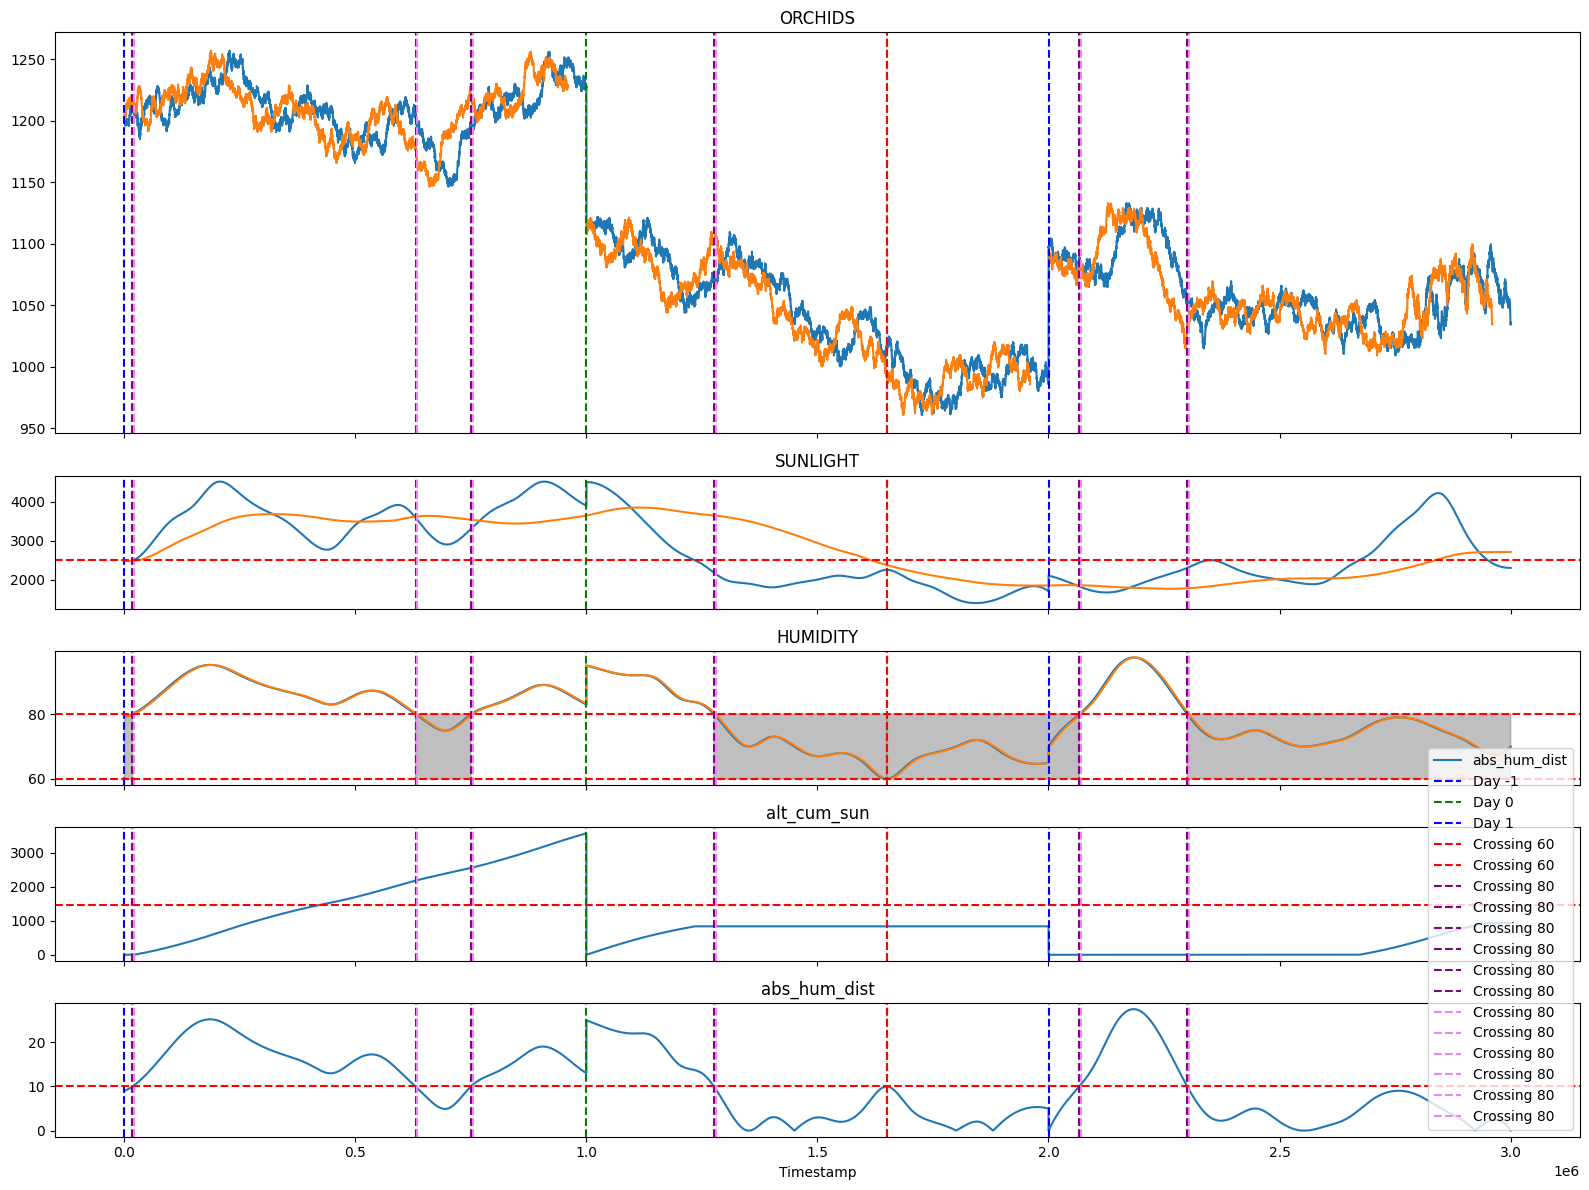

In [93]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'], label='ORCHIDS')
    axs[0].plot(df['new_timestamp'], df['orchid_shift'], label='SHIFT')
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'], label='SUNLIGHT')
    axs[1].plot(df['new_timestamp'], df['sun_roll'], label='sun_roll')
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'], label='HUMIDITY')
    axs[2].plot(df['new_timestamp'], df['roll_hum_avg'], label='roll_hum_avg')
    axs[2].set_title('HUMIDITY')
    
    # Plot cum_sun vs new_timestamp
    axs[3].plot(df['new_timestamp'], df['alt_cum_sun'], label='alt_cum_sun')
    axs[3].set_title('alt_cum_sun')

    # HUM dist
    axs[4].plot(df['new_timestamp'], df['abs_hum_dist'], label='abs_hum_dist')
    axs[4].set_title('abs_hum_dist')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='blue', linestyle='--', label='Day 1')

        # Detecting threshold crossings for HUMIDITY at 60 and 80
    for threshold in [60, 80]:
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity = df['HUMIDITY'].shift(1)
        # Crossing up the threshold
        crossing_up = (df['HUMIDITY'] > threshold) & (shifted_humidity <= threshold)
        # Crossing down the threshold
        crossing_down = (df['HUMIDITY'] < threshold) & (shifted_humidity >= threshold)
        # Combine crossing up and down
        crossings = crossing_up | crossing_down

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='red' if threshold == 60 else 'purple', linestyle='--', 
                           label=f'Crossing {threshold}')
                
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity1 = df['roll_hum_avg'].shift(1)
        # Crossing up the threshold
        crossing_up1 = (df['roll_hum_avg'] > threshold) & (shifted_humidity1 <= threshold)
        # Crossing down the threshold
        crossing_down1 = (df['roll_hum_avg'] < threshold) & (shifted_humidity1 >= threshold)
        # Combine crossing up and down
        crossings1 = crossing_up1 | crossing_down1

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings1, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='pink' if threshold == 60 else 'violet', linestyle='--', 
                           label=f'Crossing {threshold}')
    
    # Highlighting region between 60 and 80 for HUMIDITY
    axs[2].fill_between(df['new_timestamp'], 60, 80, where=(df['HUMIDITY'] >= 60) & (df['HUMIDITY'] <= 80), color='gray', alpha=0.5, label='Target Humidity Zone')
    
    # Red lines for thresholds
    axs[1].axhline(2500, color='red', linestyle='--', label='Sunlight Threshold')
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    axs[3].axhline(2500*7/12, color='red', linestyle='--', label='Cum Sun Threshold')
    axs[4].axhline(10, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)

In [94]:
# target_humidity_df = orchids[(orchids['HUMIDITY'] >= 60) & (orchids['HUMIDITY'] <= 80) & (orchids['day'] == -1) & (orchids['timestamp'] > 745000)].reset_index()
# target_humidity_df.head(50)

In [95]:
orchids_cleaned = orchids[(orchids['abs_hum_dist'] <= 10) & (orchids['day'] < 1)].dropna().copy() # 
X = orchids_cleaned[features_mid_hum].copy()
y = orchids_cleaned['orchid_shift']
orchids_cleaned

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alt_remain_sun_exp,sun_roll,sun_change,sun_diff,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,roll_hum_avg_dist,abs_roll_hum_avg_dist,tte,hum_dist_change_tte,orchid_diff,orchid_shift,orchid_log,orchid_sun,orchid_hum
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,100,0.0,0.250000,24.571429,4.690680e+10,2499.709850,-2.321200,-58.03,9.004100,9.004100,0.0,8136.374771,1.0,0,1,0.005190,0.4100,79.002050,9.002050,9.002050,79.002050,9.002050,9.002050,99.999,4.672967,1.75,1203.25,7.091534,-3.015682,426.829268
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,200,0.0,0.250000,24.571429,4.690680e+10,2499.421800,-2.296533,-57.40,9.008210,9.008210,0.0,8169.884086,1.0,0,1,0.005202,0.4110,79.004103,9.004103,9.004103,79.004103,9.004103,9.004103,99.998,4.686213,0.00,1205.25,7.091534,-0.000000,0.000000
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,300,0.0,0.250000,24.571429,4.690680e+10,2499.135850,-2.271849,-56.77,9.012340,9.012340,0.0,8203.695480,1.0,0,1,0.005227,0.4130,79.006163,9.006163,9.006163,79.006163,9.006163,9.006163,99.997,4.710884,0.00,1203.25,7.091534,-0.000000,0.000000
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,400,0.0,0.250000,24.571429,4.690680e+10,2498.852000,-2.247148,-56.14,9.016490,9.016490,0.0,8237.811558,1.0,0,1,0.005252,0.4150,79.008228,9.008228,9.008228,79.008228,9.008228,9.008228,99.996,4.735581,0.00,1204.25,7.091534,-0.000000,0.000000
5,-1,500,1200.25,1.5,9.5,-2.0,2497.1614,79.020660,500,0.0,0.250000,24.571429,4.690680e+10,2498.570233,-2.222830,-55.52,9.020660,9.020660,0.0,8272.234955,1.0,0,1,0.005277,0.4170,79.010300,9.010300,9.010300,79.010300,9.010300,9.010300,99.995,4.760307,-1.50,1204.25,7.090285,2.701729,-359.712230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19597,0,959600,997.50,1.3,9.5,-2.6,1824.1178,64.779015,1959700,0.0,835.962438,0.000000,1.000000e+00,1846.713872,0.943010,17.20,-5.220985,5.220985,0.0,185.116434,1.0,0,1,-0.002684,-0.1739,74.427921,4.427921,4.427921,64.848283,-5.151717,5.151717,90.404,-1.267050,-0.25,988.25,6.905252,-1.453488,143.760782
19598,0,959700,997.50,1.3,9.5,-2.6,1824.2881,64.777290,1959800,0.0,835.962438,0.000000,1.000000e+00,1846.711617,0.933602,17.03,-5.222710,5.222710,0.0,185.436035,1.0,0,1,-0.002663,-0.1725,74.426915,4.426915,4.426915,64.846147,-5.153853,5.153853,90.403,-1.257284,0.00,988.00,6.905252,0.000000,-0.000000
19599,0,959800,997.50,1.3,9.5,-2.6,1824.4565,64.775566,1959900,0.0,835.962438,0.000000,1.000000e+00,1846.709434,0.923100,16.84,-5.224434,5.224434,0.0,185.756003,1.0,0,1,-0.002661,-0.1724,74.425910,4.425910,4.425910,64.844023,-5.155977,5.155977,90.402,-1.256990,0.00,988.75,6.905252,0.000000,-0.000000
19600,0,959900,995.75,1.3,9.5,-2.6,1824.6230,64.773865,1960000,0.0,835.962438,0.000000,1.000000e+00,1846.707322,0.912601,16.65,-5.226135,5.226135,0.0,186.072243,1.0,0,1,-0.002626,-0.1701,74.424905,4.424905,4.424905,64.841911,-5.158089,5.158089,90.401,-1.240643,-1.75,986.75,6.903496,-10.510511,1028.806584


In [96]:
%%time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = X_train # scaler.fit_transform(X_train) # 
X_test_scaled = X_test # scaler.transform(X_test) # 

# Initialize the Linear Regression model
lin_reg = Lasso(alpha=0.01, max_iter=100000)

# Train the model
lin_reg.fit(X_train_scaled, y_train)

# Make predictions using the testing set
lin_pred = lin_reg.predict(X_test_scaled)

# Initialize the Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=250, max_depth=4, min_samples_leaf=500, min_samples_split=1200, random_state=42)

# Train the model
forest_reg.fit(X_train_scaled, y_train)

# Make predictions using the testing set
forest_pred = forest_reg.predict(X_test_scaled)

CPU times: total: 7.78 s
Wall time: 7.51 s


In [97]:
# For Linear Regression
lin_r2 = r2_score(y_test, lin_pred)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_mae = mean_absolute_error(y_test, lin_pred)

print(f"Linear Regression R2: {lin_r2}")
print(f"Linear Regression MSE: {lin_mse}")
print(f"Linear Regression MAE: {lin_mae}")

print("Coefficients (Betas):", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

# For Random Forest Regressor
forest_r2 = r2_score(y_test, forest_pred)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_mae = mean_absolute_error(y_test, forest_pred)

print(f"Random Forest R2: {forest_r2}")
print(f"Random Forest MSE: {forest_mse}")
print(f"Random Forest MAE: {forest_mae}")

Linear Regression R2: 0.9776903424381407
Linear Regression MSE: 113.89347964785364
Linear Regression MAE: 8.796280768961111
Coefficients (Betas): [-4.53714723e+00  1.42450590e-01  0.00000000e+00  5.96028350e-09
  4.93644417e+00 -1.90410907e-01 -0.00000000e+00  3.05389021e+01
  0.00000000e+00 -0.00000000e+00 -1.99220184e+00  5.60532133e+00
  9.27762849e-04  0.00000000e+00  2.25389057e+00  1.36902247e-01
  0.00000000e+00  0.00000000e+00 -3.19256339e+01  2.68342610e-01
  4.15952311e+00 -1.46069968e+01  2.32993384e-02 -0.00000000e+00]
Intercept: 177.25466113870073
Random Forest R2: 0.9522171456656462
Random Forest MSE: 243.93720668084117
Random Forest MAE: 12.489938528666439


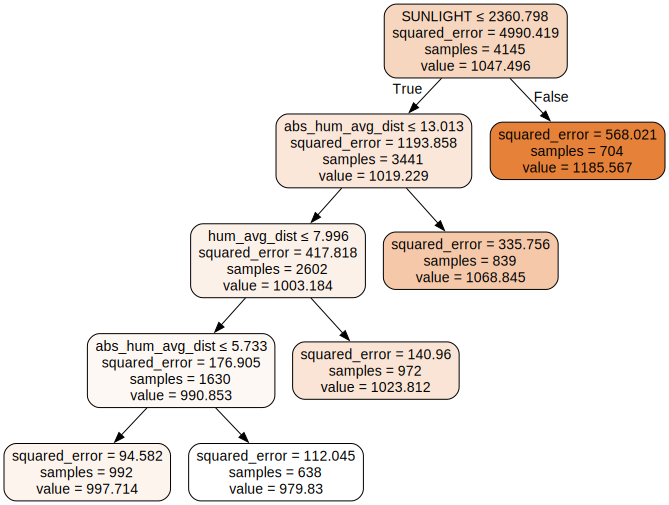

In [98]:
# Assuming 'forest_reg' is your trained Random Forest Regressor
# Visualize the first tree from the random forest
estimator = forest_reg.estimators_[0]

dot_data_rf = export_graphviz(estimator, out_file=None,
                              feature_names=X_train.columns,
                              class_names=['ORCHIDS'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_tree_clean")  # This saves the tree visualization to a file
graph_rf

In [99]:
orchids_cleaned1 = orchids[(orchids['abs_hum_dist'] > 10) & (orchids['day'] < 1)].dropna().copy() # 
X2 = orchids_cleaned1[features_hl_hum].copy()
y = orchids_cleaned1['orchid_shift']
orchids_cleaned1

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alt_remain_sun_exp,sun_roll,sun_change,sun_diff,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,roll_hum_avg_dist,abs_roll_hum_avg_dist,tte,hum_dist_change_tte,orchid_diff,orchid_shift,orchid_log,orchid_sun,orchid_hum
177,-1,17700,1215.50,1.3,9.5,-2.2,2486.7410,80.006966,17700,0.0,0.250000,24.571429,4.690680e+10,2479.174171,1.537992,38.24,10.006966,10.006966,0.006966,22180.437817,1.006990,1,1,0.008958,0.7166,79.458149,9.458149,9.458149,79.772096,9.772096,9.772096,99.823,8.947896,-0.25,1213.75,7.102911,-0.653766,-34.886966
178,-1,17800,1215.75,1.4,9.5,-2.2,2487.1277,80.014150,17800,0.0,0.250000,24.571429,4.690680e+10,2479.218604,1.555047,38.67,10.014150,10.014150,0.014150,22340.355820,1.014251,1,1,0.008979,0.7184,79.461255,9.461255,9.461255,79.778728,9.778728,9.778728,99.822,8.975918,0.25,1214.25,7.103116,0.646496,34.799555
179,-1,17900,1214.75,1.4,9.5,-2.2,2487.5193,80.021350,17900,0.0,0.250000,24.571429,4.690680e+10,2479.264719,1.574507,39.16,10.021350,10.021350,0.021350,22501.786837,1.021580,1,1,0.008998,0.7200,79.464367,9.464367,9.464367,79.785376,9.785376,9.785376,99.821,9.001478,-1.00,1213.25,7.102294,-2.553626,-138.888889
180,-1,18000,1213.25,1.4,9.5,-2.2,2487.9153,80.028564,18000,0.0,0.250000,24.571429,4.690680e+10,2479.312513,1.591947,39.60,10.028564,10.028564,0.028564,22664.701654,1.028976,1,1,0.009015,0.7214,79.467484,9.467484,9.467484,79.792041,9.792041,9.792041,99.820,9.024571,-1.50,1212.25,7.101058,-3.787879,-207.929027
181,-1,18100,1211.75,1.4,9.5,-2.2,2488.3160,80.035790,18100,0.0,0.250000,24.571429,4.690680e+10,2479.361982,1.610585,40.07,10.035790,10.035790,0.035790,22829.069936,1.036438,1,1,0.009029,0.7226,79.470606,9.470606,9.470606,79.798721,9.798721,9.798721,99.819,9.045190,-1.50,1213.75,7.099821,-3.743449,-207.583725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16496,0,649500,1013.75,1.6,9.5,-2.4,2249.9290,59.999670,1649600,0.0,835.962438,0.000000,1.000000e+00,2374.159745,0.114227,2.57,-10.000330,10.000330,0.000330,22033.735728,1.000330,1,1,-0.000250,-0.0150,77.730725,7.730725,7.730725,60.058951,-9.941049,9.941049,93.505,-0.233771,0.50,993.25,6.921412,19.455253,-3333.333333
16497,0,649600,1015.75,1.6,9.5,-2.4,2249.9507,59.999588,1649700,0.0,835.962438,0.000000,1.000000e+00,2373.832291,0.096447,2.17,-10.000412,10.000412,0.000412,22035.542568,1.000412,1,1,-0.000137,-0.0082,77.727996,7.727996,7.727996,60.056520,-9.943480,9.943480,93.504,-0.127795,2.00,994.25,6.923383,92.165899,-24390.243903
16498,0,649700,1016.25,1.6,9.5,-2.4,2249.9688,59.999580,1649800,0.0,835.962438,0.000000,1.000000e+00,2373.505002,0.080446,1.81,-10.000420,10.000420,0.000420,22035.718853,1.000420,1,1,-0.000013,-0.0008,77.725268,7.725268,7.725268,60.054156,-9.945844,9.945844,93.503,-0.012468,0.50,995.25,6.923875,27.624309,-62499.999991
16499,0,649800,1017.25,1.6,9.5,-2.4,2249.9830,59.999650,1649900,0.0,835.962438,0.000000,1.000000e+00,2373.177877,0.063112,1.42,-10.000350,10.000350,0.000350,22034.176407,1.000350,1,1,0.000117,0.0070,77.722540,7.722540,7.722540,60.051858,-9.948142,9.948142,93.502,0.109090,1.00,994.25,6.924858,70.422535,14285.714286


In [100]:
%%time

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y, test_size=0.2, random_state=42)

X_train_scaled1 = X_train1 # scaler.fit_transform(X_train) # 
X_test_scaled1 = X_test1 # scaler.transform(X_test) # 

# Initialize the Linear Regression model
lin_reg1 = Lasso(alpha=0.01, max_iter=100000)

# Train the model
lin_reg1.fit(X_train_scaled1, y_train1)

# Make predictions using the testing set
lin_pred1 = lin_reg1.predict(X_test_scaled1)

# Initialize the Random Forest Regressor
forest_reg1 = RandomForestRegressor(n_estimators=250, max_depth=4, min_samples_leaf=500, min_samples_split=1200, random_state=42)

# Train the model
forest_reg1.fit(X_train_scaled1, y_train1)

# Make predictions using the testing set
forest_pred1 = forest_reg1.predict(X_test_scaled1)

CPU times: total: 14 s
Wall time: 13.1 s


In [101]:
# For Linear Regression
lin_r2 = r2_score(y_test1, lin_pred1)
lin_mse = mean_squared_error(y_test1, lin_pred1)
lin_mae = mean_absolute_error(y_test1, lin_pred1)

print(f"Linear Regression R2: {lin_r2}")
print(f"Linear Regression MSE: {lin_mse}")
print(f"Linear Regression MAE: {lin_mae}")

print("Coefficients (Betas):", lin_reg1.coef_)
print("Intercept:", lin_reg1.intercept_)

# For Random Forest Regressor
forest_r2 = r2_score(y_test1, forest_pred1)
forest_mse = mean_squared_error(y_test1, forest_pred1)
forest_mae = mean_absolute_error(y_test1, forest_pred1)

print(f"Random Forest R2: {forest_r2}")
print(f"Random Forest MSE: {forest_mse}")
print(f"Random Forest MAE: {forest_mae}")

Linear Regression R2: 0.7855851470601681
Linear Regression MSE: 751.1623434706979
Linear Regression MAE: 22.58244894576713
Coefficients (Betas): [ 1.53971537e+00  1.57310947e-02  9.62993993e+00 -2.97123828e-01
 -4.83311042e-01 -9.32465524e+00  2.50455978e+00  3.32213829e-06
  3.91170410e+01 -1.50006550e+01 -0.00000000e+00  5.58946677e+00
  9.15166865e-02  8.37725354e+00  5.41996644e+00  8.04572862e+00
 -4.19316276e-03 -3.11905897e+01]
Intercept: 725.9604720469374
Random Forest R2: 0.9382640662507458
Random Forest MSE: 216.28029978153953
Random Forest MAE: 9.43871610785399


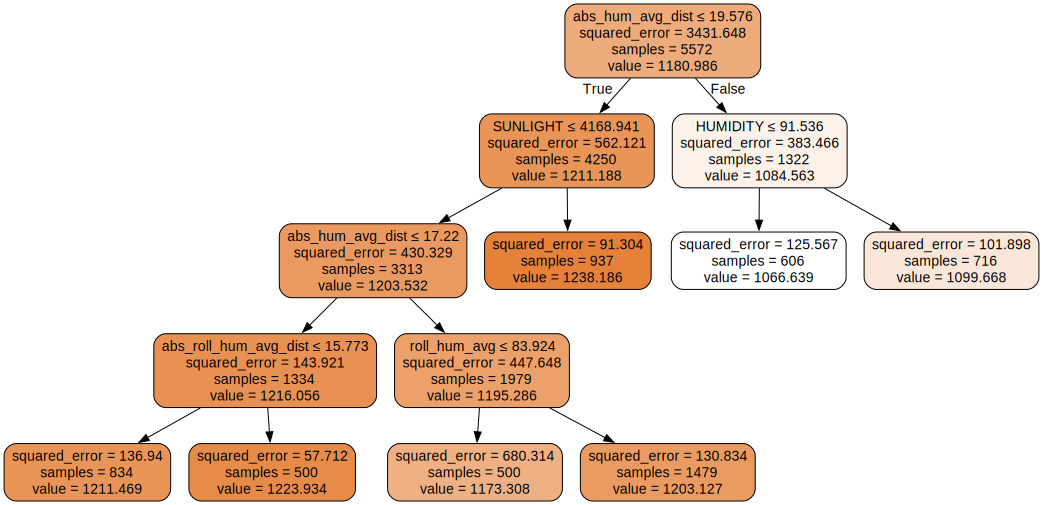

In [102]:
# Assuming 'forest_reg' is your trained Random Forest Regressor
# Visualize the first tree from the random forest
estimator1 = forest_reg1.estimators_[0]

dot_data_rf1 = export_graphviz(estimator1, out_file=None,
                              feature_names=X_train1.columns,
                              class_names=['ORCHIDS'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_rf1 = graphviz.Source(dot_data_rf1)
graph_rf1.render("random_forest_tree_clean1")  # This saves the tree visualization to a file
graph_rf1

In [103]:
# prices_0.head(50)

In [104]:
print(orchids_cleaned.describe())

               day      timestamp      ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  \
count  8209.000000    8209.000000  8209.000000     8209.000000    8209.000000   
mean     -0.167499  615489.292240  1050.182148        1.399147      10.217871   
std       0.373444  203407.026943    67.258512        0.211204       1.638155   
min      -1.000000     100.000000   960.750000        1.100000       8.500000   
25%       0.000000  463700.000000  1000.250000        1.300000       9.500000   
50%       0.000000  649700.000000  1028.250000        1.400000       9.500000   
75%       0.000000  754800.000000  1083.250000        1.500000      10.500000   
max       0.000000  960000.000000  1215.750000        2.100000      19.500000   

       IMPORT_TARIFF     SUNLIGHT     HUMIDITY  new_timestamp      alt_sun  \
count    8209.000000  8209.000000  8209.000000   8.209000e+03  8209.000000   
mean       -2.631794  2057.861698    69.933043   1.448073e+06     4.546286   
std         0.344304   499.516896   

C:\Users\axrpo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\axrpo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [105]:
print(orchids_cleaned1.describe())

                day      timestamp       ORCHIDS  TRANSPORT_FEES  \
count  10990.000000   10990.000000  10990.000000    10990.000000   
mean      -0.748408  378908.835305   1181.663103        1.391328   
std        0.433948  281677.840002     56.808702        0.187755   
min       -1.000000       0.000000   1013.250000        1.100000   
25%       -1.000000  146300.000000   1120.250000        1.200000   
50%       -1.000000  291250.000000   1206.250000        1.300000   
75%        0.000000  565975.000000   1219.250000        1.500000   
max        0.000000  960000.000000   1257.250000        2.100000   

       EXPORT_TARIFF  IMPORT_TARIFF      SUNLIGHT      HUMIDITY  \
count   10990.000000   10990.000000  10990.000000  10990.000000   
mean        9.903822      -2.532411   3617.846637     87.596944   
std         1.401556       0.293050    612.176728      4.190206   
min         8.500000      -3.600000   2177.774000     59.999580   
25%         8.500000      -2.600000   3154.826700   

C:\Users\axrpo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
